In [ ]:
# EZH2_expression_by_iteration.ipynb

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import scipy
import matplotlib.pyplot as plt
from statannot import add_stat_annotation
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
sns.set(style="whitegrid")

In [15]:
df_cell = pd.read_csv('/Users/22holleranm/DATA_481_766_protein_networks/shared_team_files/lung_cancer.csv', index_col=0)

# Combining EZH2 measurements from nuclear and cytoplasmic intensities

# Set up containers for combined EZH2 intensities
combined_EZH2_intensity_03 = []
combined_EZH2_intensity_12 = []

# Load your data
data = df_cell  # Use the main dataset

# Define the EZH2 conditions for each fluorophore/antibody, for iteration 3 and 12
conditions_02 = ['03_EZH2_nuc_mean', '03_EZH2_ring_mean']
conditions_04 = ['12_EZH2_nuc_mean', '12_EZH2_ring_mean']

# Compute combined EZH2 intensities for iteration 03
for i in data.index:
    # Average nuclear and cytoplasmic HER2 measurements
    tmp = (data.loc[i, '03_EZH2_nuc_mean'] + data.loc[i, '03_EZH2_ring_mean']) / 2
    combined_EZH2_intensity_03.append(tmp)

# Compute combined EZH2 intensities for iteration 12
for i in data.index:
    tmp = (data.loc[i, '12_EZH2_nuc_mean'] + data.loc[i, '12_EZH2_ring_mean']) / 2
    combined_EZH2_intensity_12.append(tmp)

# Add the combined HER2 intensities as new columns in the dataset
data['03_EZH2_combined'] = combined_EZH2_intensity_03
data['12_EZH2_combined'] = combined_EZH2_intensity_12

all_nuc_or_cyt = ['01_cMyc_nuc_mean', '01_BRD4_nuc_mean', '01_CDK2_nuc_mean', '02_CyclinD1_nuc_mean', 
 '03_CDC6_nuc_mean', '02_HER2_nuc_mean', '04_cMycS62_nuc_mean', '04_FOXO1_nuc_mean', 
 '05_cMycT58_nuc_mean', '05_CyclinA_nuc_mean', '05_CyclinB1_nuc_mean', '06_FOXO3A_nuc_mean', 
 '06_ZEB1_nuc_mean', '07_pRb_S807811_nuc_mean', '07_Rb_nuc_mean', '07_p21_nuc_mean', 
 '08_CDT1_nuc_mean', '08_MDM2_nuc_mean', '09_SKP2_nuc_mean', '10_TGFbeta_nuc_mean', 
 '10_E2F1_nuc_mean', '11_cFOS_nuc_mean', '04_HER2_nuc_mean', '12_cPARP_nuc_mean']

selection = all_nuc_or_cyt

Text(0, 0.5, 'EZH2 Combined Expression for 12 Iteration')

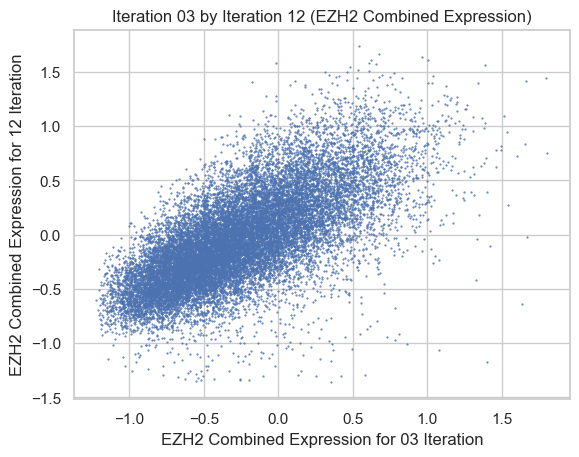

In [19]:
#Creating scatterplot to look at relationship between EZH2 expression for Iteration 03 and 12 for each cell

data = df_cell
cond1 = '03_EZH2_combined'  # Column representing EZH2 combined expression for iteration 03
cond2 = '12_EZH2_combined'  # Column representing EZH2 combined expression for iteration 12

plt.scatter(data[cond1], data[cond2], s=0.25)
plt.title("Iteration 03 by Iteration 12 (EZH2 Combined Expression)")
plt.xlabel("EZH2 Combined Expression for 03 Iteration")
plt.ylabel("EZH2 Combined Expression for 12 Iteration")